In [14]:
import numpy as np
import configparser
import matplotlib.pyplot as plt
import io


from google.colab import files
uploaded = files.upload()

Saving anno_cortex.npy to anno_cortex.npy
Saving raw_cortex.npy to raw_cortex.npy


In [58]:
raw_channel = np.load(io.BytesIO(uploaded['raw_cortex.npy']))
anno_channel = np.load(io.BytesIO(uploaded['anno_cortex.npy']))
print(raw_channel.shape)
print(anno_channel.shape)


(300, 300, 300)
(300, 300, 300)


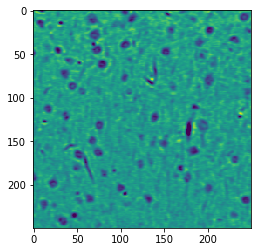

In [59]:

# Divide the data into training, test (don't change this!)
x_train = raw_channel[0:250,0:250,0:100]
x_test = raw_channel[0:250,0:250,100:150]
y_train = anno_channel[0:250,0:250,0:100]
#Cell bodies are indicated with the annotation 2, convert this so y_train=1 is a cell and y_train=0 is not a cell
y_train[y_train>2]=0
y_train[y_train<2]=0
y_train[y_train==2]=1

#Cell bodies are indicated with the annotation 2, convert this so y_test=1 is a cell and y_test=0 is not a cell
y_test = anno_channel[0:250,0:250,100:150]
y_test[y_test>2]=0
y_test[y_test<2]=0
y_test[y_test==2]=1
#display images
plt.imshow(np.squeeze(x_train[:,:,50]))

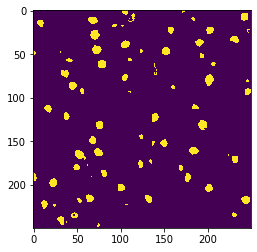

In [60]:
#show labels
plt.imshow(np.squeeze(y_train[:,:,50]))

In [0]:
#a bad threshold detector for cells- we can do better!
def bad_detector(x_data, parameters):
  y_hat = (x_data<parameters['threshold']).astype(int)
  return y_hat

#compute the f1 metric to tell how good something is
def f1_score(y_true,y_hat,threshold=0.5):
  y_true[y_true>threshold] = 1
  y_true[y_true<threshold] = 0
  y_hat[y_hat>threshold] = 1
  y_hat[y_hat<threshold] = 0
  
  #https://en.wikipedia.org/wiki/F1_score
  y_and = np.add(y_true,y_hat)
  true_detections = len(np.where(y_and>1)[0])#add the two numbers together, if both are true it will be 2
  detect_positives = len(np.where(y_hat>0)[0]) #positive numbers indicate detections
  true_positives = len(np.where(y_true>0)[0]) #posiive numbers indicate true cells
  precision = true_detections/detect_positives
  recall = true_detections/true_positives
  f1 = 2*precision*recall/(precision+recall)
  return f1

In [100]:
#This is the bad baseline you need to beat!
y_hat = bad_detector(x_test,{"threshold":110})
f1 = f1_score(y_test,y_hat,threshold=0.5)
print(f'f1 score for bad detector is {f1}. Try to do better!')

(250, 250, 50)
1
0
(250, 250, 50)
1
0
144670
1029727
144670
f1 score for bad detector is 0.2463732451632625. Try to do better!


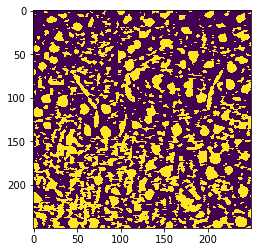

In [101]:
#YOUR CODE HERE
#Print sizes of xtrain, ytrain, xtest, ytest
#Find maximum and minumum values of xtrain, ytrain, xtest, ytest

In [0]:
#YOUR CODE HERE
#Select or train parameters for your classifier using only xtrain, ytrain

In [0]:
#YOUR CODE HERE
#run your parameters for your classifier to produce y_hat using only your parameters and x_test

In [0]:
#YOUR CODE HERE
#use the f1_score function using your y_hat and y_test
#print f1 score

In [0]:
#YOUR CODE HERE
#Plot an example of your y_hat and y_test